En este ejercicio vamos a aprender:

- Consultas de SQL (básica)
- Mezcla de tablas
- Exploración ciega de datos

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
%matplotlib inline


In [6]:
with sqlite3.connect('/home/leon/data/database.sqlite') as con: #apuntar esta direccion al lugar donde se encuentra el archivo en su maquina
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)

In [7]:
countries.head(5)

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [8]:
matches.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [9]:
leagues.head(5)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [10]:
teams.head(5)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [12]:
selected_countries = ['England','France','Germany','Italy','Spain']

Primero filtramos nuestros datos para analizar sólo los paises que nos interesan.

In [14]:
countries = countries[countries.name.isin(selected_countries)]


In [17]:
countries.name.unique()

array(['England', 'France', 'Germany', 'Italy', 'Spain'], dtype=object)

In [18]:
leagues = countries.merge(leagues,on='id',suffixes=('', '_y'))


El merge logró que pudiesemos ver los paises en la tabla de ligas.

In [19]:
leagues.head(5)

,id,name,country_id,name_y
0,1729,England,1729,England Premier League
1,4769,France,4769,France Ligue 1
2,7809,Germany,7809,Germany 1. Bundesliga
3,10257,Italy,10257,Italy Serie A
4,21518,Spain,21518,Spain LIGA BBVA


Ahora vamos a elegir los partidos que nos interesan.

In [20]:
matches = matches[matches.league_id.isin(leagues.id)]

matches = matches[['id', 'country_id' ,'league_id', 'season', 'stage', 'date','match_api_id', 'home_team_api_id', 'away_team_api_id','B365H', 'B365D' ,'B365A']]

matches.dropna(inplace=True)

matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,B365D,B365A
1728,1729,1729,1729,2008/2009,1,2008-08-17 00:00:00,489042,10260,10261,1.29,5.5,11.00
1729,1730,1729,1729,2008/2009,1,2008-08-16 00:00:00,489043,9825,8659,1.20,6.5,15.00
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,5.50,3.6,1.67
1731,1732,1729,1729,2008/2009,1,2008-08-16 00:00:00,489045,8654,8528,1.91,3.4,4.20
1732,1733,1729,1729,2008/2009,1,2008-08-17 00:00:00,489046,10252,8456,1.91,3.4,4.33


B365H, B365D, B365A son los momios de que gane el de casa, empaten o gane el visitante.

In [22]:
matches.size

174876

Hay 174,876 partidos

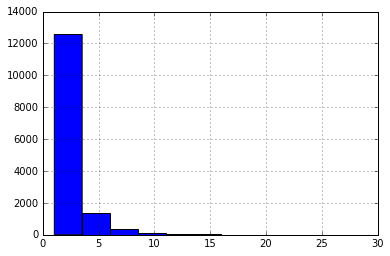

In [26]:
matches.B365H.hist(bins=10)

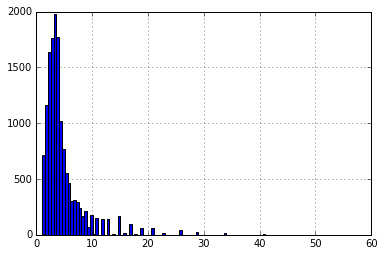

In [33]:
matches.B365A.hist(bins=100)

In [36]:
matches_teams = matches[matches.B365A<matches.B365H]

In [38]:
matches_teams.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,B365D,B365A
1730,1731,1729,1729,2008/2009,1,2008-08-16 00:00:00,489044,8472,8650,5.50,3.60,1.67
1734,1735,1729,1729,2008/2009,1,2008-08-16 00:00:00,489048,8549,8586,3.20,3.40,2.25
1740,1741,1729,1729,2008/2009,10,2008-10-29 00:00:00,489134,8549,8456,2.88,3.30,2.50
1742,1743,1729,1729,2008/2009,10,2008-10-29 00:00:00,489136,8667,8455,8.00,4.33,1.44
1749,1750,1729,1729,2008/2009,11,2008-11-01 00:00:00,489143,8586,8650,3.50,3.30,2.10


In [41]:
matches_teams.size

45384

In [77]:
matches_teams = matches[5*matches.B365A<matches.B365H]

In [78]:
matches_teams.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,B365H,B365D,B365A
1742,1743,1729,1729,2008/2009,10,2008-10-29 00:00:00,489136,8667,8455,8.0,4.33,1.44
1756,1757,1729,1729,2008/2009,11,2008-11-01 00:00:00,489150,10194,9825,8.0,4.50,1.40
1764,1765,1729,1729,2008/2009,12,2008-11-09 00:00:00,489158,8655,8455,8.0,4.33,1.44
1776,1777,1729,1729,2008/2009,13,2008-11-15 00:00:00,489170,8659,8455,12.0,5.00,1.30
1835,1836,1729,1729,2008/2009,19,2008-12-26 00:00:00,489230,10194,10260,12.0,5.00,1.30


In [79]:
list_teams = matches_teams.away_team_api_id.unique()

In [80]:
teams[teams.team_api_id.isin(list_teams)]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
25,3457,10260,11.0,Manchester United,MUN
27,3459,9825,1.0,Arsenal,ARS
30,3462,8650,9.0,Liverpool,LIV
34,3466,8456,10.0,Manchester City,MCI
43,3475,8455,5.0,Chelsea,CHE
61,9539,9827,59.0,Girondins de Bordeaux,BOR
67,9545,9748,66.0,Olympique Lyonnais,LYO
69,9547,9829,69.0,AS Monaco,MON
70,9548,9847,73.0,Paris Saint-Germain,PSG
94,15617,9823,21.0,FC Bayern Munich,BMU
